In [1]:
import pandas as pd

data = pd.read_csv('https://drive.google.com/uc?id=1H1d_wOrwtBmlH9KYPmvTVWROF70JuCvF')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [50]:
#Формируем набор признаков и целевую переменную

In [5]:
X = data[data.columns[:-1]]
X.head(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0


In [6]:
Y = data['affairs']
Y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affairs, Length: 6366, dtype: int64

In [7]:
model = LogisticRegression()

In [51]:
#Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [52]:
#Обучаем модель

In [9]:
   from sklearn.preprocessing import StandardScaler

   scaler = StandardScaler()
   X_train = scaler.fit_transform(X_train)
   X_test = scaler.transform(X_test)

In [10]:
model.fit(X_train, Y_train)

LogisticRegression()

In [53]:
#Получаем прогнозные значения модели (переменная predictions)

In [11]:
predictions = model.predict_proba(X_test)

In [12]:
predictions[:2]

array([[0.3747024 , 0.6252976 ],
       [0.92536372, 0.07463628]])

In [13]:
model.score(X_train, Y_train)

0.7230700179533214

In [14]:
model.score(X_test, Y_test)

0.7319371727748691

In [55]:
#Считаем accuracy последней модели
#Показывает, какая доля предсказаний оказалась верной

In [15]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], Y_test):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [16]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [17]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [18]:
precision = tp / (tp + fp)
precision

0.6330532212885154

In [57]:
#precision- Оценивает, насколько "чистыми" были предсказания положительного класса (сколько из них верны).

In [19]:
recall = tp / (tp + fn)
recall

0.3723228995057661

In [58]:
#recall- Оценивает, насколько хорошо модель "захватывает" истинные положительные примеры.

In [20]:
from sklearn.metrics import recall_score, precision_score

In [21]:
pred = model.predict(X_test)

In [22]:
recall_score(Y_test, pred)

0.3723228995057661

In [23]:
precision_score(Y_test, pred)

0.6330532212885154

In [24]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [59]:
#ROC-кривая позволяет оценить, как хорошо модель балансирует между False Positives и True Positives.

In [25]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

In [26]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, inf)
(0.0, 0.0016474464579901153, 0.9291510612420256)
(0.0, 0.008237232289950576, 0.8993565154499207)
(0.0007674597083653108, 0.008237232289950576, 0.8978712294245857)
(0.0007674597083653108, 0.019769357495881382, 0.8649566011148528)
(0.0030698388334612432, 0.019769357495881382, 0.8547281284313413)
(0.0030698388334612432, 0.023064250411861616, 0.8543238751441967)
(0.003837298541826554, 0.023064250411861616, 0.8520824634468593)
(0.003837298541826554, 0.032948929159802305, 0.8335297192599775)
(0.004604758250191865, 0.032948929159802305, 0.8334248310815225)


In [27]:
import matplotlib.pyplot as plt

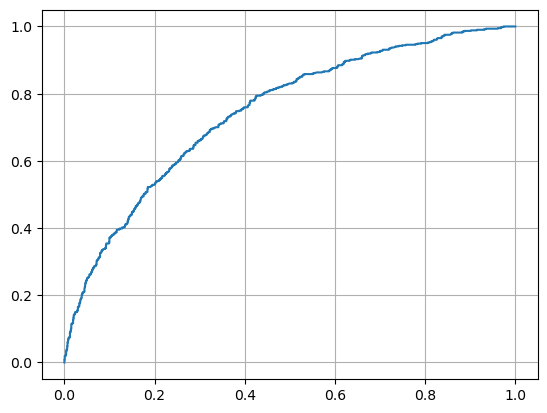

In [28]:
plt.plot(fpr, tpr)
plt.grid()

In [60]:
#Построим еще одну модель и сравним их между собой

In [29]:
Xshort = X.loc[ :, ['age', 'educ']]
Xshort.head()

,age,educ
0,32.0,17.0
1,27.0,14.0
2,22.0,16.0
3,37.0,16.0
4,27.0,14.0


In [30]:
model2 = LogisticRegression()

In [31]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split(Xshort, Y, test_size=0.3, random_state=0)

In [32]:
model2.fit(X_train_short, Y_train)

LogisticRegression()

In [33]:
predictions2 = model2.predict_proba(X_test_short)

In [34]:
fpr2, tpr2, thres2 = roc_curve(Y_test, predictions2[:, 1])

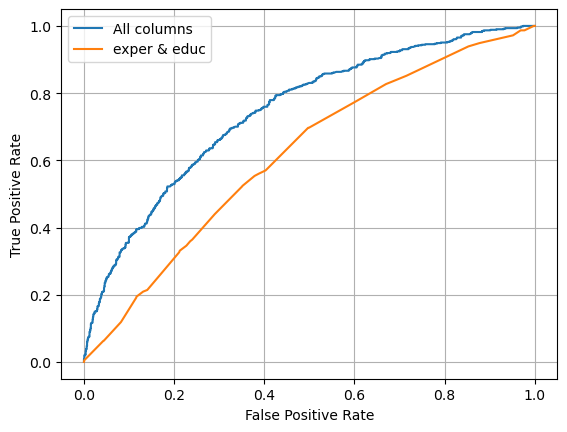

In [35]:
plt.plot(fpr, tpr, label='All columns' )
plt.plot(fpr2, tpr2, label='exper & educ')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()
plt.show()

In [62]:
#Посчитаем площадь под ROC-кривой для двух моделей

In [36]:
from sklearn.metrics import roc_curve


In [37]:
from sklearn.metrics import roc_auc_score

In [38]:
roc_auc_score(Y_test, predictions[:, 1])

0.7451237228496903

In [39]:
roc_auc_score (Y_test, predictions2[:, 1])

0.6169149636942248

In [63]:
#Второй способ

In [40]:
from sklearn.metrics import auc

In [41]:
auc(fpr, tpr)

0.7451237228496903

In [42]:
auc(fpr2, tpr2)

0.6169149636942248

In [66]:
#Пример влияния L1 и L2-регуляризации
#L1 и L2-регуляризация — это методы, используемые для предотвращения переобучения моделей машинного обучения

In [43]:
model1 = LogisticRegression(penalty='l1',
                            C=0.01,
                            solver='liblinear').fit(X_train, Y_train)
predictions = model1.predict_proba(X_test)

In [44]:
model2 = LogisticRegression(penalty='l2',
                            C=0.01,
                            solver='liblinear').fit(X_train, Y_train)
predictions2 = model2.predict_proba(X_test)

In [45]:
model3 = LogisticRegression(penalty='l2',
                            C=1,
                            solver='liblinear').fit(X_train, Y_train)
predictions3 = model3.predict_proba(X_test)

In [46]:
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])
fpr2, tpr2, thres2 = roc_curve(Y_test, predictions2[:, 1])
fpr3, tpr3, thres3 = roc_curve(Y_test, predictions3[:, 1])

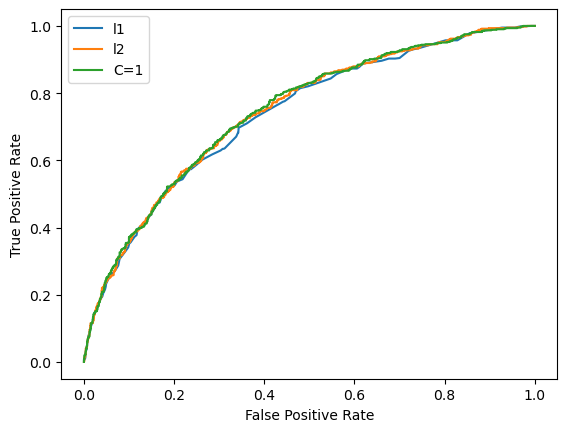

In [47]:
plt.plot(fpr, tpr, label='l1')
plt.plot(fpr2, tpr2, label='l2')
plt.plot(fpr3, tpr3, label='C=1')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

In [67]:
#Вычисляет площадь под кривой ROC

In [49]:
auc1 = roc_auc_score(Y_test, predictions[:, 1])
auc2 = roc_auc_score(Y_test, predictions2[:, 1])
auc3 = roc_auc_score(Y_test, predictions3[:, 1])
auc1, auc2, auc3

(0.7360172507747298, 0.7431816831263806, 0.7451249871984685)